# Exploratory Analysis For Master Thesis "Machine Learning Approach to Polkadots Validator Election Algorithm"

## Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np



## Load Data

In [15]:
df = pd.read_csv("../data_collection/data/processed_data/model_1_data_904.csv")


## General EDA

In [16]:
df.head()

,validator,overall_total_bond,overall_proportional_bond,nominator_count,elected_current_era,elected_previous_era,era
0,111B8CxcmnWbuDLyGvgUmRezDCK1brRZmvUuQ6SrFdMyc3S,22106233840263308,4.695097e+15,220,1,1,900
1,1123RekaPHgWaPL5v9qfsikRemeZdYC4tvKXYuLXwhfT3NKy,5976067379414947,5.988224e+14,326,0,0,900
2,1124RsfEgJEZvEq4HbtGFcpqoxnqSy79EjNZY9tzPct3AB6o,1329903832775779,1.847613e+14,122,0,0,900
3,112A6wJPeDsf34nsqoAkAtQ8n74vJU8qmyKMtzX7ZPQH2kXa,128346992403185,1.577255e+13,27,0,0,900
4,112EMfAnjR92TPqp7eKNGwiDwFGS41gJ3MWr5MPyJkyidLLc,4358389883284655,3.794420e+14,106,0,0,900


In [5]:
df.shape

(5999, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   validator                  5999 non-null   object 
 1   overall_total_bond         5999 non-null   int64  
 2   overall_proportional_bond  5999 non-null   float64
 3   nominator_count            5999 non-null   int64  
 4   elected_current_era        5999 non-null   int64  
 5   elected_previous_era       5999 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 281.3+ KB


In [6]:
df.describe()

,total_bond,proportional_bond,nominator_count,elected_current_era,elected_previous_era,elected_counter,self_stake,avg_stake_per_nominator,era
count,4.922710e+05,4.922710e+05,492271.000000,492271.000000,492271.000000,492271.000000,492271.0,4.922710e+05,492271.000000
mean,5.395138e+16,5.105592e+15,188.733421,0.242537,0.232770,32.850385,0.0,4.110231e+15,787.080106
std,9.164648e+16,8.138970e+15,433.395726,0.428618,0.422597,80.206919,0.0,2.716217e+16,117.870433
min,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,590.000000
25%,9.557382e+13,6.978229e+12,2.000000,0.000000,0.000000,0.000000,0.0,1.661854e+12,682.000000
50%,5.392559e+15,4.377818e+14,12.000000,0.000000,0.000000,0.000000,0.0,7.181366e+12,785.000000
75%,7.470571e+16,9.546983e+15,153.000000,0.000000,0.000000,0.000000,0.0,6.574346e+13,890.000000
max,9.009553e+17,1.340960e+17,4370.000000,1.000000,1.000000,401.000000,0.0,3.200000e+17,995.000000


## Pairwise comparison of active set

591
1
592
20
593
7
594
4
595
7
596
8
597
8
598
10
599
14
600
16
601
13
602
11
603
10
604
6
605
14
606
8
607
6
608
12
609
10
610
12
611
10
612
13
613
8
614
12
615
12
616
10
617
12
618
10
619
14
620
9
621
10
622
9
623
7
624
13
625
14
626
19
627
47
628
10
629
12
630
8
631
12
632
12
633
19
634
13
635
12
636
24
637
9
638
17
639
6
640
11
641
13
642
13
643
7
644
11
645
13
646
8
647
13
648
9
649
10
650
3
651
3
652
4
653
2
654
3
655
18
656
10
657
11
658
8
659
7
660
23
661
23
662
10
663
14
664
16
665
13
666
8
667
10
668
10
669
14
670
10
671
12
672
10
673
14
674
16
675
13
676
12
677
15
678
12
679
9
680
13
681
15
682
18
683
11
684
14
685
17
686
14
687
13
688
17
689
12
690
12
691
13
692
12
693
9
694
11
695
9
696
14
697
19
698
16
699
11
700
12
701
17
702
13
703
13
704
14
705
10
706
11
707
10
708
8
709
13
710
13
711
10
712
10
713
8
714
18
715
19
716
17
717
15
718
1
719
2
720
1
721
1
722
21
723
10
724
12
725
14
726
11
727
12
728
8
729
15
730
12
731
19
732
12
733
10
734
10
735
9
736
13
737
13
738
16
73

"\nshowdf = df[(df['elected_current_era'] == 0) & (df['elected_counter'] > 0)]\nshowdf.groupby(['validator']).count()\n"

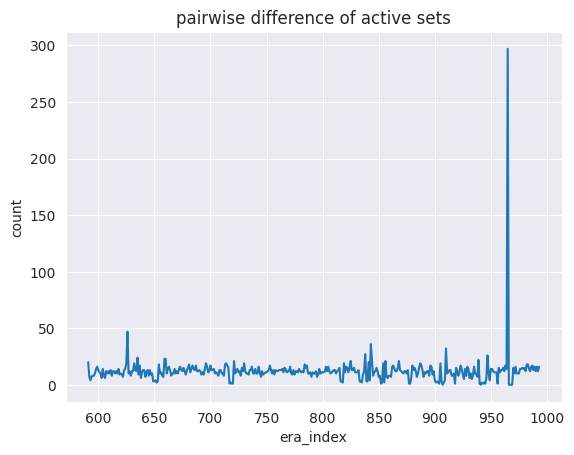

In [12]:
era_index = []
set_difference = []
for i in range(590,994):
    print(i+1)
    df1 = set(df[(df['era'] == i) & (df['elected_current_era'] == 1)]['validator'])
    df2 = set(df[(df['era'] == i+1) & (df['elected_current_era'] == 1)]['validator'])
    era_index.append(i)
    set_difference.append(len(df1.difference(df2)))
    print(len(df1.difference(df2)))
print(np.mean(set_difference))
plt.title("pairwise difference of active sets")
plt.xlabel("era_index")
plt.ylabel("count")
plt.plot(era_index[1:], set_difference[1:])

"""
showdf = df[(df['elected_current_era'] == 0) & (df['elected_counter'] > 0)]
showdf.groupby(['validator']).count()
"""

## Set validator count to max count per validator

In [59]:
# set the elected counter equal at all validators of same address.
validators = set(df.validator.unique())
count_adapted_df = df.copy()
for validator in validators:
    counters = set(count_adapted_df.loc[count_adapted_df['validator'] == validator].elected_counter)
    maxcounter = max(counters)
    count_adapted_df.loc[count_adapted_df['validator'] == validator, 'elected_counter'] = maxcounter
    #df.loc['Unnamed: 0' == validator] =

AttributeError: 'DataFrame' object has no attribute 'elected_counter'

## Cumulative distribution plot

Text(0.5, 1.0, 'Cumulative elected validator distribution')

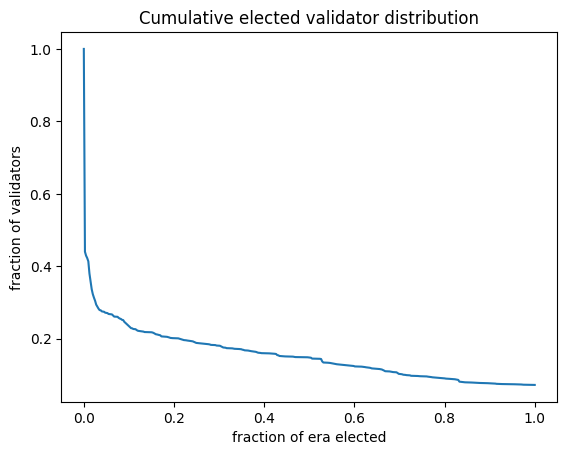

In [151]:
grouped_df = count_adapted_df.copy()
#df55 = df55[df55['elected_counter'] != 374]
grouped_df= grouped_df.groupby(['validator', 'elected_counter']).count().reset_index()
grouped_df = grouped_df.elected_counter.value_counts().sort_index(ascending=False).reset_index()

grouped_df['index'] = grouped_df['index'].div(grouped_df['index'].max())
grouped_df['elected_counter'] = grouped_df['elected_counter'].div(grouped_df['elected_counter'].sum())
#plt.hist(grouped_df['index'], 200, histtype="stepfilled", alpha=.7, cumulative=-1)
cumsum = np.cumsum(grouped_df['elected_counter'])
plt.plot(grouped_df['index'], cumsum, )
plt.xlabel('fraction of era elected')
plt.ylabel('fraction of validators')
plt.title('Cumulative elected validator distribution')


## validator election frequency distribution

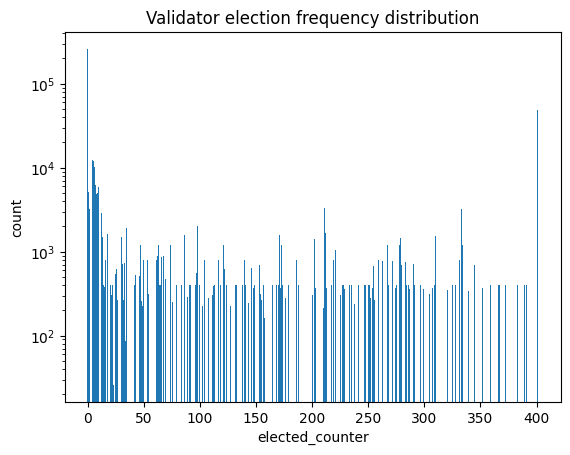

In [160]:
df2 = count_adapted_df.groupby(["elected_counter"]).size().reset_index(name='counter')
plt.bar(df2['elected_counter'], df2['counter'])
plt.xlabel("elected_counter")
plt.ylabel("count")
plt.yscale('log')
plt.title("Validator election frequency distribution")
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.show()

In [11]:
# remove non-numeric columns
df = df.drop(df.dtypes[df.dtypes == 'object'].index, axis=1)

df.corr(method='pearson')

,era,proportional_bond,total_bond,number_of_validators,solution_bond,validator_frequency_current_era,prev_min_stake,prev_sum_stake,prev_variance_stake,overall_proportional_bond,overall_total_bond,average_proportional_bond,average_total_bond,expected_sum_stake
era,1.000000,-0.000657,-0.000410,0.013689,-0.000643,-0.001784,0.704227,-0.275962,-0.766318,0.008529,0.004608,-0.000847,-0.000514,-0.022529
proportional_bond,-0.000657,1.000000,0.871944,0.012478,0.979263,-0.118470,-0.000705,0.000327,0.000728,-0.018727,0.043343,0.775575,0.690734,-0.102206
total_bond,-0.000410,0.871944,1.000000,0.056044,0.853863,-0.110103,-0.000267,0.000350,0.000369,-0.024244,0.089444,0.710001,0.797208,-0.152392
number_of_validators,0.013689,0.012478,0.056044,1.000000,0.012219,0.066992,0.009910,-0.011568,-0.012902,-0.001669,0.099708,0.006133,0.038470,-0.018772
solution_bond,-0.000643,0.979263,0.853863,0.012219,1.000000,-0.118800,-0.000690,0.000320,0.000713,-0.024796,0.038564,0.759024,0.677078,-0.100046
validator_frequency_current_era,-0.001784,-0.118470,-0.110103,0.066992,-0.118800,1.000000,0.003414,-0.001483,-0.002791,0.744541,0.413498,-0.152751,-0.138111,0.290036
prev_min_stake,0.704227,-0.000705,-0.000267,0.009910,-0.000690,0.003414,1.000000,-0.117732,-0.920412,0.005641,0.028134,-0.000908,-0.000334,-0.019663
prev_sum_stake,-0.275962,0.000327,0.000350,-0.011568,0.000320,-0.001483,-0.117732,1.000000,0.486792,-0.006709,0.001703,0.000421,0.000439,-0.004150
prev_variance_stake,-0.766318,0.000728,0.000369,-0.012902,0.000713,-0.002791,-0.920412,0.486792,1.000000,-0.007517,-0.022437,0.000939,0.000463,0.017598
overall_proportional_bond,0.008529,-0.018727,-0.024244,-0.001669,-0.024796,0.744541,0.005641,-0.006709,-0.007517,1.000000,0.596703,-0.024145,-0.030412,0.125762


## Description of Losers

In [58]:
loser_df = count_adapted_df.copy()
loser_df = loser_df.loc[(loser_df['elected_counter'] == 0) & (loser_df['elected_current_era'] == 0)]
describe_loser_df = loser_df.describe()
describe_loser_df.reset_index(inplace=True)
describe_loser_df = describe_loser_df[describe_loser_df['index'] != 'count']
describe_loser_df.columns

NameError: name 'count_adapted_df' is not defined

## Description of Winners

In [212]:
winner_df = count_adapted_df.copy()
winner_df = winner_df.loc[winner_df['elected_counter'] == 401]
describe_winner_df = winner_df.describe()
describe_winner_df.reset_index(inplace=True)
describe_winner_df = describe_winner_df[describe_winner_df['index'] != 'count']


In [256]:
#winner_df.describe().to_frame('data').boxplot(meanline=True, showmeans=True)
#describe_winner_df['total_bond'].to_frame('data').boxplot(meanline=True, showmeans=True)
concated_dfs = []
for index, column in enumerate(describe_winner_df.columns):
    concated_dfs.append(pd.concat([describe_winner_df[column], describe_loser_df[column]], axis=1))
    concated_dfs[index].columns = ["winner", "loser"]

Text(0.5, 1.0, 'total bond')

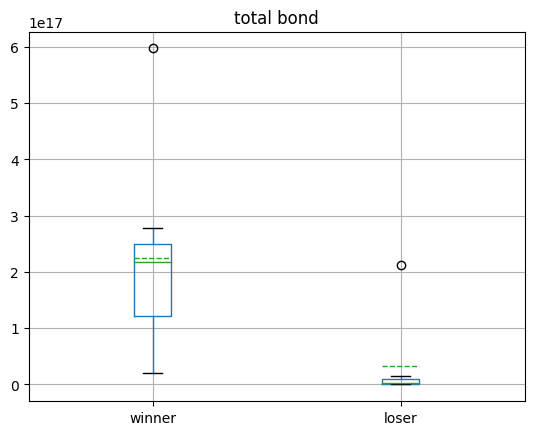

In [252]:
concated_dfs[1].boxplot(meanline=True, showmeans=True)
plt.title("total bond")

Text(0.5, 1.0, 'proportional bond')

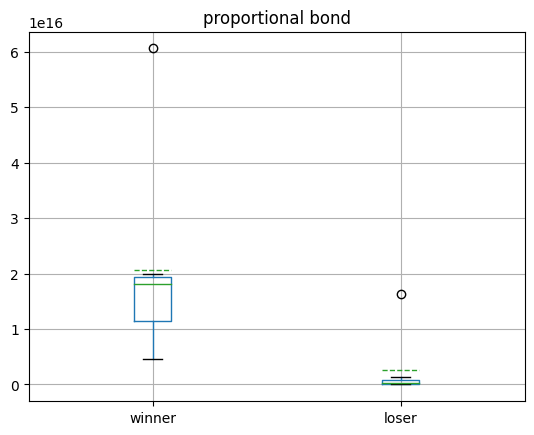

In [240]:
concated_dfs[2].boxplot(meanline=True, showmeans=True)
plt.title("proportional bond")

Text(0.5, 1.0, 'nominator count')

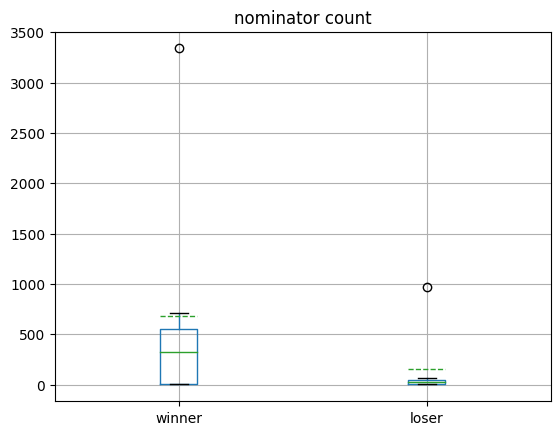

In [244]:
concated_dfs[3].boxplot(meanline=True, showmeans=True)
plt.title("nominator count")

Text(0.5, 1.0, 'avg stake')

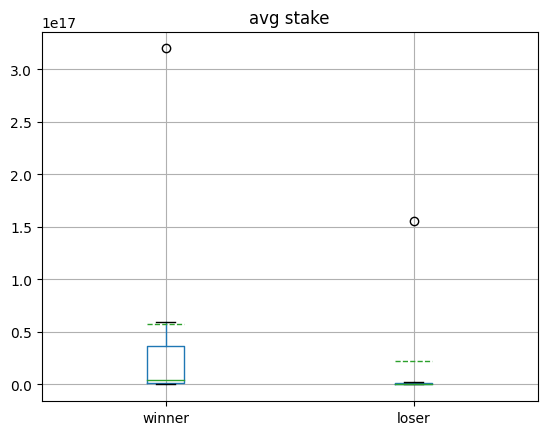

In [249]:
concated_dfs[8].boxplot(meanline=True, showmeans=True)
plt.title("avg stake")

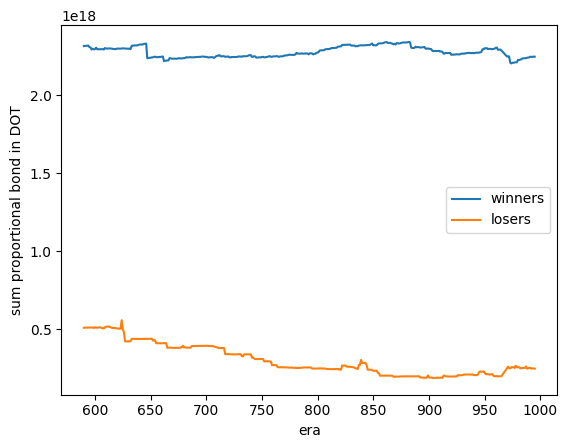

In [276]:
proportional_bonds_winners = winner_df.groupby("era").sum('proportional_bond').reset_index()
proportional_bonds_losers = loser_df.groupby("era").sum('proportional_bond').reset_index()
plt.plot(proportional_bonds_winners['era'], proportional_bonds_winners['proportional_bond'])
plt.plot(proportional_bonds_losers['era'], proportional_bonds_losers['proportional_bond'])
plt.xlabel("era")
plt.ylabel("sum proportional bond in DOT")
plt.legend(["winners", "losers"])
plt.show()

In [57]:
proportional_bonds_winners = winner_df.groupby("era").mean('nominator_count').reset_index()
proportional_bonds_losers = loser_df.groupby("era").mean('nominator_count').reset_index()
plt.plot(proportional_bonds_winners['era'], proportional_bonds_winners['nominator_count'])
plt.plot(proportional_bonds_losers['era'], proportional_bonds_losers['nominator_count'])
plt.axhline(y=256, color='r', linestyle='-')
plt.xlabel("era")
plt.ylabel("mean nominator count")
plt.legend(["winners", "losers"])
plt.show()

NameError: name 'winner_df' is not defined

# First Model Training efforts

In [18]:
df.head()

,validator,overall_total_bond,overall_proportional_bond,nominator_count,elected_current_era,elected_previous_era,era
0,111B8CxcmnWbuDLyGvgUmRezDCK1brRZmvUuQ6SrFdMyc3S,22106233840263308,4.695097e+15,220,1,1,900
1,1123RekaPHgWaPL5v9qfsikRemeZdYC4tvKXYuLXwhfT3NKy,5976067379414947,5.988224e+14,326,0,0,900
2,1124RsfEgJEZvEq4HbtGFcpqoxnqSy79EjNZY9tzPct3AB6o,1329903832775779,1.847613e+14,122,0,0,900
3,112A6wJPeDsf34nsqoAkAtQ8n74vJU8qmyKMtzX7ZPQH2kXa,128346992403185,1.577255e+13,27,0,0,900
4,112EMfAnjR92TPqp7eKNGwiDwFGS41gJ3MWr5MPyJkyidLLc,4358389883284655,3.794420e+14,106,0,0,900


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
df_copy = df.copy()

#scaled_df = scaled_df.loc[scaled_df['elected_counter'] == 1]
features = ['overall_total_bond', 'overall_proportional_bond', 'nominator_count', 'elected_previous_era', 'era']
X = df_copy.loc[:, features]
y = df_copy.loc[:, "elected_current_era"]

test_era = 903
X_train = X[X["era"] != test_era].drop(columns=["era"])
X_test = X[X["era"] == test_era].drop(columns=["era"])
y_train = y[X["era"] != test_era]
y_test = y[X["era"] == test_era]

predicted_dataframe = df[X["era"] == test_era].copy()

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)

In [77]:
predicted_dataframe['predictions'] = predictions[:, 1]


In [78]:
predicted_dataframe.to_csv(f"../data_collection/data/intermediate_results/elected_probability_{test_era}.csv", index=False)

In [79]:
model.score(X_test, y_test)

0.9949874686716792

In [9]:
pca = PCA(n_components=2)
principal_components=pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(data = principal_components, columns = ['PC 1', 'PC 2'])
print(pca_df)

            PC 1      PC 2
0       0.092909  0.869967
1      -0.912767 -0.121585
2       0.515218  1.286346
3      -0.910690 -0.119537
4      -0.912961 -0.121776
...          ...       ...
459552 -0.920109 -0.128824
459553 -0.920109 -0.128824
459554 -0.919924 -0.128641
459555 -0.920109 -0.128824
459556 -0.920109 -0.128824

[459557 rows x 2 columns]


In [10]:
for_visual = pd.concat([pca_df, df['elected_current_era']], axis = 1)
print(for_visual)

            PC 1      PC 2  elected_current_era
0       0.092909  0.869967                    1
1      -0.912767 -0.121585                    0
2       0.515218  1.286346                    1
3      -0.910690 -0.119537                    0
4      -0.912961 -0.121776                    0
...          ...       ...                  ...
459552 -0.920109 -0.128824                    0
459553 -0.920109 -0.128824                    0
459554 -0.919924 -0.128641                    0
459555 -0.920109 -0.128824                    0
459556 -0.920109 -0.128824                    0

[459557 rows x 3 columns]


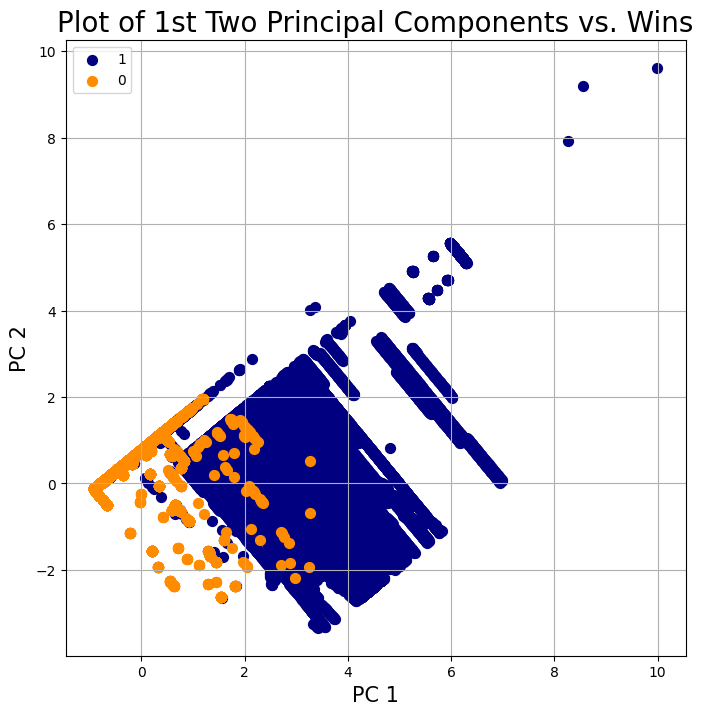

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot of 1st Two Principal Components vs. Wins', fontsize = 20)
targets = [1,0]
colors = ['navy', 'darkorange']
for target, color in zip(targets,colors):
    indicesToKeep = for_visual['elected_current_era'] == target
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [12]:
pca.explained_variance_ratio_

array([0.82479018, 0.12391601])

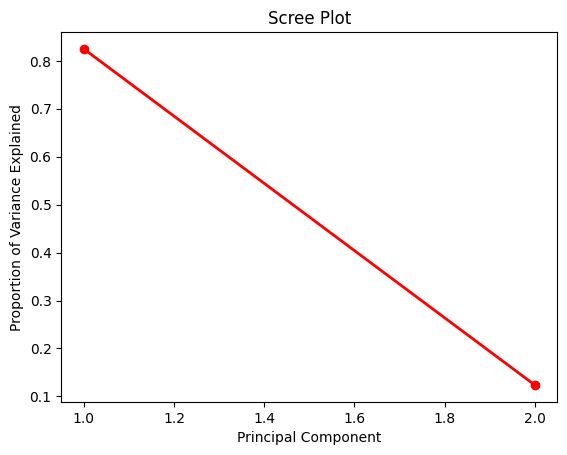

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [14]:
df.columns


Index(['validator', 'total_bond', 'proportional_bond', 'list_of_nominators',
       'nominator_count', 'elected_current_era', 'elected_previous_era',
       'elected_counter', 'self_stake', 'avg_stake_per_nominator', 'era'],
      dtype='object')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [75]:
era_split_df = df.copy()
features = ['proportional_bond', 'elected_previous_era', 'elected_counter']

index = df.index[df['era'] < 965].tolist()
x_scaled = era_split_df.loc[:, features]
x_train = x_scaled.loc[index]
y = era_split_df.loc[:, "elected_current_era"]
y_train = y.loc[index]

print('what')
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

accuracies = []
for i in range(965,995):
    index = df.index[df['era'] == i].tolist()
    X_test = x_scaled.loc[index]
    y_test = y.loc[index]
    accuracies.append(accuracy_score(y_test, clf.predict(X_test)))

print(accuracies)


what


/home/ben/Documents/universitaet/polkadot_validator_selection/venv/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/ben/Documents/universitaet/polkadot_validator_selection/venv/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required by RandomForestClassifier.

In [5]:
from sklearn.model_selection import cross_val_score

In [6]:
loan_data_class_1 = df[df['elected_current_era'] == 1]
number_class_1 = len(loan_data_class_1)
loan_data_class_0 = df[df['elected_current_era'] == 0].sample(number_class_1)

final_loan_data = pd.concat([loan_data_class_1,
                         	loan_data_class_0])


#eradf = df.loc[df['era'] == 990]
#noteradf = df.loc[df['era'] != 990]

features = ['proportional_bond','elected_previous_era','elected_counter']


X_train = final_loan_data.loc[:, features].values
y_train = final_loan_data.loc[:, "elected_current_era"].values

X_test = final_loan_data.loc[:, features].values
y_test = final_loan_data.loc[:, "elected_current_era"].values

y_test.shape

(238788,)

In [7]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [17]:
prediction_of_probability = clf.predict_proba(X_test)
df.head()

,validator,total_bond,proportional_bond,list_of_nominators,nominator_count,elected_current_era,elected_previous_era,elected_counter,self_stake,avg_stake_per_nominator,era
0,1zugcag7cJVBtVRnFxv5Qftn7xKAnR6YJ9x4x3XLgGgmNnS,173428979826227580,1.434129e+16,{'1SdEjEWdfJCisR9FpnpgAoTAEUKAivLSFj2sRMeKWxXm...,1468,1,0,0,0,9.769268e+12,590
1,16HxQKtm8FogERURhxaJ7n6dnvzVjnXcHP54nBFSFr6ZCqUh,950993578466105,1.041153e+14,{'1eE4N8j5sF3W1N3bf535hZ7VMpGbwyBD4MLXsKB5pxWP...,16,0,0,0,0,6.507203e+12,590
2,148Ta5cWD3wekK3C6EbdDhYrdxC5e71VTKQCjmHUjE1DCG31,130773957029866447,2.031984e+16,{'12YdvQC6ripH1RnnykQnoDSqyKyy7qX8gAR7ixLAumGs...,61,1,0,0,0,3.331121e+14,590
3,1uFscCqjzMDDGRS8bh9W8f4t94WVXgvnzTeSTrdjC8fJZA6,972806309572318,1.335135e+14,{'1M1vsos73tp6pp3zymbrxP2bAfeszLShuURcitbHTRmZ...,138,0,0,0,0,9.674891e+11,590
4,123viL2RvWMFmCQQBzii6JzDUPbL6MZQa27q2VWvBpkrRran,912207170000000,1.013652e+14,{'1s1SGPC2v5pYfcDNQKFhNiscsiu9VRZVywxaAgXJuKzE...,2,0,0,0,0,5.068262e+13,590


In [95]:
df_test = pd.DataFrame(X_test)
df_test['Target'] = y_test
df_test['prob_0'] = prediction_of_probability[:,0]
df_test['prob_1'] = prediction_of_probability[:,1]
df_test

,0,1,2,Target,prob_0,prob_1
0,4.099672e+16,1.0,396.0,1,0.012515,0.987485
1,2.000030e+16,1.0,396.0,1,0.012515,0.987485
2,2.000000e+16,1.0,396.0,1,0.012515,0.987485
3,2.916835e+16,1.0,396.0,1,0.012515,0.987485
4,2.000000e+16,1.0,396.0,1,0.012515,0.987485
...,...,...,...,...,...,...
1205,3.480815e+12,0.0,0.0,0,0.998137,0.001863
1206,2.105640e+11,0.0,0.0,0,0.998137,0.001863
1207,2.581024e+11,0.0,0.0,0,0.998137,0.001863
1208,2.036022e+11,0.0,0.0,0,0.998137,0.001863


In [9]:
accuracy_score(y_test, clf.predict(X_test))

0.9966748747843275

In [14]:
scores = cross_val_score(clf, X_test, y_test, cv=10)

In [15]:
print("%0.6f accuracy with a standard deviation of %0.6f" % (scores.mean(), scores.std()))

0.996675 accuracy with a standard deviation of 0.003768


In [57]:
from sklearn.metrics import confusion_matrix

In [86]:
confusion_matrix(y_test, clf.predict(X_test))

array([[912,   1],
       [  0, 297]])

In [25]:
from sklearn.metrics import classification_report

In [26]:
clf_report = classification_report(y_test, clf.predict(X_test), target_names=['voted', 'not voted'], output_dict=True)

<Axes: >

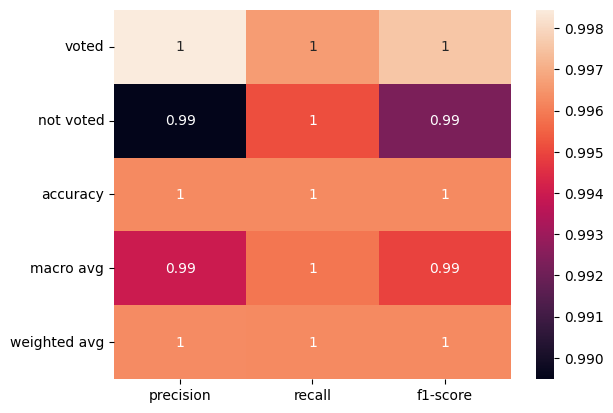

In [27]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [30]:
accuracy_score(y_test, lr.predict(X_test))

0.9944947340934808

In [36]:
print(lr.coef_)
print(lr.intercept_)
print(features)

[[-0.17179273  4.30423943  3.38519633  0.3716225  22.26633888 -0.143071  ]]
[5.93500949]
['total_bond', 'elected_previous_era', 'proportional_bond', 'nominator_count', 'elected_counter', 'avg_stake_per_nominator']


In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [38]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [39]:
accuracy_score(y_test, lda.predict(X_test))

0.9906214640090522

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
accuracy_score(y_test, knc.predict(X_test))

0.9977696057098094

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [45]:
accuracy_score(y_test, gnb.predict(X_test))

0.9907846635912612

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
accuracy_score(y_test, dtc.predict(X_test))

0.9998694403342328

In [49]:
from sklearn.svm import SVC

In [50]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [51]:
accuracy_score(y_test, svc.predict(X_test))

0.9962355296370441

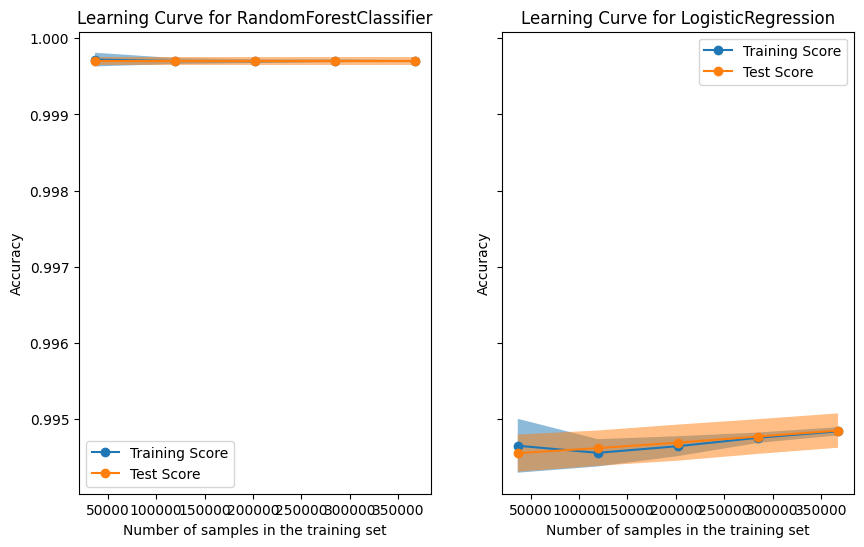

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": x_scaled,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([clf, lr]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [300]:
from sklearn.ensemble import GradientBoostingClassifier

In [301]:
gdc = GradientBoostingClassifier()
gdc.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[2.3039619e+12 3.8875112e+13 1.6293279e+13 ... 3.7746337e+11 2.5148824e+11
 5.4691103e+12].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [55]:
accuracy_score(y_test, gdc.predict(X_test))

0.9998585603620854

In [56]:
gdc.learning_rate

0.1

In [57]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, gdc.predict(X_test), pos_label=2)
metrics.auc(fpr, tpr)

/home/ben/Documents/universitaet/polkadot_validator_selection/venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


nan

In [58]:
def jitter(X, scale=0.1):
    return X + np.random.normal(0, scale, X.shape)

def jitter_test(classifier, X, y, scales = np.linspace(0, 0.5, 30), N = 5):
    out = []
    for s in scales:
        avg = 0.0
        for r in range(N):
            avg += metrics.accuracy_score(y, classifier.predict(jitter(X, s)))
        out.append(avg / N)
    return out, scales

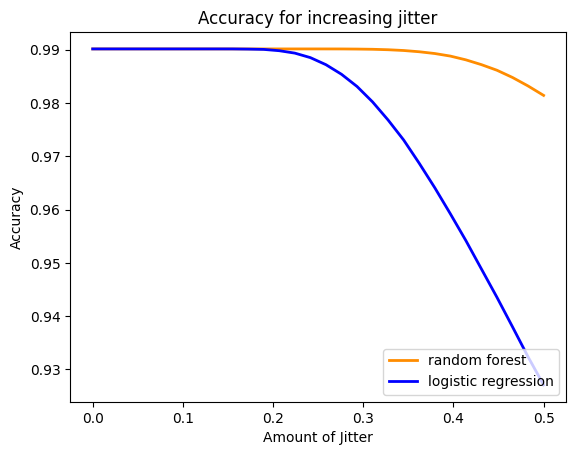

In [62]:
mdl1 = RandomForestClassifier()
mdl1.fit(x_scaled, y)

mdl2 = LogisticRegression()
mdl2.fit(x_scaled, y);
mdl1_scores, jitters = jitter_test(mdl1, x_scaled, y)
mdl2_scores, jitters = jitter_test(mdl2, x_scaled, y)
plt.figure()
lw = 2
plt.plot(jitters, mdl1_scores, color='darkorange',
         lw=lw, label='random forest')
plt.plot(jitters, mdl2_scores, color='blue',
         lw=lw, label='logistic regression')
plt.xlabel('Amount of Jitter')
plt.ylabel('Accuracy')
plt.title('Accuracy for increasing jitter')
plt.legend(loc="lower right")
plt.show()

In [365]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [366]:
n_inputs = x.shape[1]

In [367]:
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [368]:
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
history = model.fit(X_train, X_train, epochs=30, batch_size=16, verbose=2, validation_data=(X_test,X_test))


Epoch 1/30
159287/159287 - 198s - loss: 684227306480441738899937558528.0000 - val_loss: 703229202513144480267969232896.0000 - 198s/epoch - 1ms/step
Epoch 2/30
159287/159287 - 198s - loss: 684232822204493730645547155456.0000 - val_loss: 703229202513144480267969232896.0000 - 198s/epoch - 1ms/step
Epoch 3/30
159287/159287 - 197s - loss: 684229799889944694072610390016.0000 - val_loss: 703229202513144480267969232896.0000 - 197s/epoch - 1ms/step
Epoch 4/30
159287/159287 - 199s - loss: 684235844519042767218483920896.0000 - val_loss: 703229202513144480267969232896.0000 - 199s/epoch - 1ms/step
Epoch 5/30
159287/159287 - 206s - loss: 684235920076906493132807340032.0000 - val_loss: 703229202513144480267969232896.0000 - 206s/epoch - 1ms/step
Epoch 6/30
159287/159287 - 204s - loss: 684234635593223152589309214720.0000 - val_loss: 703229202513144480267969232896.0000 - 204s/epoch - 1ms/step
Epoch 7/30
159287/159287 - 206s - loss: 684238337928545722391156752384.0000 - val_loss: 703229202513144480267969

In [ ]:
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [40]:
encoder = Model(inputs=visible, outputs=bottleneck)

In [41]:
encoder.save('encoder.h5')

In [42]:
history

In [3]:
df = pd.read_csv("../data_collection/data/model_2/df_bond_distribution_testing_0.csv")
#df3 = pd.read_csv("../data_collection/df_bond_distribution_2.csv")

#df.rename(columns={"Unnamed: 0": "nominator"}, inplace=True)

In [4]:
df

,Unnamed: 0,nominator,validator,era,proportional_bond,total_bond,solution_bond,prev_min_stake,prev_sum_stake,prev_variance_stake,...,5,6,7,8,9,10,11,12,13,14
0,0,1zugcag7cJVBtVRnFxv5Qftn7xKAnR6YJ9x4x3XLgGgmNnS,1zugcag7cJVBtVRnFxv5Qftn7xKAnR6YJ9x4x3XLgGgmNnS,591,0,100000000000,100000000000,17545603034426886,6170804944090742732,-9223372036854775808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1zugcag7cJVBtVRnFxv5Qftn7xKAnR6YJ9x4x3XLgGgmNnS,1zugcag7cJVBtVRnFxv5Qftn7xKAnR6YJ9x4x3XLgGgmNnS,592,0,100000000000,100000000000,17545688853364378,6173682636384274768,-9223372036854775808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1zugcag7cJVBtVRnFxv5Qftn7xKAnR6YJ9x4x3XLgGgmNnS,1zugcag7cJVBtVRnFxv5Qftn7xKAnR6YJ9x4x3XLgGgmNnS,593,0,100000000000,100000000000,17545688853364378,6181576885516877968,-9223372036854775808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,148Ta5cWD3wekK3C6EbdDhYrdxC5e71VTKQCjmHUjE1DCG31,148Ta5cWD3wekK3C6EbdDhYrdxC5e71VTKQCjmHUjE1DCG31,591,0,11000000000,11000000000,17545603034426886,6170804944090742732,-9223372036854775808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,148Ta5cWD3wekK3C6EbdDhYrdxC5e71VTKQCjmHUjE1DCG31,148Ta5cWD3wekK3C6EbdDhYrdxC5e71VTKQCjmHUjE1DCG31,592,0,11000000000,11000000000,17545688853364378,6173682636384274768,-9223372036854775808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159510,55134,16cQ4LEAY7bcUBQ3gmuewPhiThkePGL3GKVcsAihRTpiD2wF,12YQwgZshvaibw1z4AcMXC1kNnpvUPgY4FA1AsKuUv9F613t,591,-84091105914,1515810128104,280832435631,17545603034426886,6170804944090742732,-9223372036854775808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159511,55135,16cQ4LEAY7bcUBQ3gmuewPhiThkePGL3GKVcsAihRTpiD2wF,1zugcacYFxX3HveFpJVUShjfb3KyaomfVqMTFoxYuUWCdD8,591,-1891404966761,1515810128104,566071713,17545603034426886,6170804944090742732,-9223372036854775808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159512,55136,16cQ4LEAY7bcUBQ3gmuewPhiThkePGL3GKVcsAihRTpiD2wF,15qomv8YFTpHrbiJKicP4oXfxRDyG4XEHZH7jdfJScnw2xnV,591,-84091105914,1515810128104,469824242664,17545603034426886,6170804944090742732,-9223372036854775808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159513,55137,16cQ4LEAY7bcUBQ3gmuewPhiThkePGL3GKVcsAihRTpiD2wF,121gZtuuG6sq3BZp1UKg8oRLRZvp89SAYSxXypwDJjaSRJR5,591,-84091105914,1515810128104,16939438900,17545603034426886,6170804944090742732,-9223372036854775808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.describe()

,Unnamed: 0,era,proportional_bond,total_bond,solution_bond,prev_min_stake,prev_sum_stake,prev_variance_stake,total_proportional_bond,0,...,5,6,7,8,9,10,11,12,13,14
count,159515.000000,159515.000000,1.595150e+05,1.595150e+05,1.595150e+05,1.595150e+05,1.595150e+05,1.595150e+05,1.595150e+05,159515.000000,...,159515.00000,159515.000000,159515.000000,159515.000000,159515.000000,159515.000000,159515.000000,159515.000000,159515.000000,159515.000000
mean,26623.617509,591.970279,5.371651e+12,1.039057e+15,1.161938e+14,1.754566e+16,6.175182e+18,-9.223372e+18,2.894756e+14,0.117268,...,0.06511,0.057725,0.059863,0.041125,0.032273,0.028662,0.014017,0.010707,0.004514,0.002708
std,15414.611641,0.812855,2.596042e+14,1.171108e+16,1.079302e+15,4.081434e+10,4.505973e+15,0.000000e+00,2.319236e+15,0.321740,...,0.24672,0.233223,0.237233,0.198579,0.176724,0.166855,0.117563,0.102922,0.067032,0.051970
min,0.000000,591.000000,-1.365741e+15,1.000000e+10,1.200000e+03,1.754560e+16,6.170805e+18,-9.223372e+18,-1.060389e+16,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13292.500000,591.000000,-4.553956e+11,1.794253e+12,2.879866e+11,1.754560e+16,6.170805e+18,-9.223372e+18,-5.060128e+14,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26585.000000,592.000000,0.000000e+00,4.544843e+12,1.317364e+12,1.754569e+16,6.173683e+18,-9.223372e+18,2.226024e+13,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,39878.000000,593.000000,1.010135e+11,1.942220e+13,5.000000e+12,1.754569e+16,6.181577e+18,-9.223372e+18,6.384483e+14,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,55138.000000,593.000000,2.192364e+16,4.461624e+17,3.033351e+16,1.754569e+16,6.181577e+18,-9.223372e+18,1.889651e+16,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
features = ["proportional_bond", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14"] # potentially add total proportional bond i.e grouping by validator
x = df.loc[:, features]
x_scaled = StandardScaler().fit_transform(x)
y = df.loc[:, ['solution_bond']]
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
#X_train = x.loc[df['era'] != 841].drop("era", axis=1)
#X_test = x.loc[df['era'] == 841].drop("era", axis=1)
#y_train = y.loc[df['era'] != 841].drop("era", axis=1)
#y_test = y.loc[df['era'] == 841].drop("era", axis=1)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge

In [8]:
lr = Ridge(alpha=0.5)

In [9]:
lr.fit(X_train, y_train)

Ridge(alpha=0.5)

In [10]:
mean_squared_error(y_test, lr.predict(X_test))

1.1108625283961952e+30

In [11]:
lr.predict(X_test)

array([[1.11056359e+14],
       [1.09174034e+14],
       [1.09594241e+14],
       ...,
       [1.11056359e+14],
       [1.11057118e+14],
       [1.11056359e+14]])

In [12]:
y_test/1e16

,solution_bond
158558,1.230433e-04
133548,3.410284e-09
44626,2.340344e-05
57877,7.996806e-02
59174,5.180807e-08
...,...
29112,3.686961e-04
100323,8.290824e-06
66264,1.317445e-03
39990,1.797497e-04


In [13]:
mean_absolute_error(y_test, lr.predict(X_test))

200485432295269.8

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
gdr = GradientBoostingRegressor()

In [18]:
gdr.fit(X_train, y_train)

/home/ben/Documents/universitaet/polkadot_validator_selection/models/venv/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [19]:
mean_squared_error(y_test, gdr.predict(X_test))

1.0941246913200495e+30

In [12]:
from xgboost.sklearn import XGBRegressor

In [13]:
xgbr = XGBRegressor()

In [14]:
xgbr.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
mean_squared_error(y_test, xgbr.predict(X_test))

In [47]:
from sklearn.metrics import r2_score

In [130]:
r2_score(y_test, xgbr.predict(X_test))

0.9454040682205085

/home/ben/Documents/universitaet/polkadot_validator_selection/venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

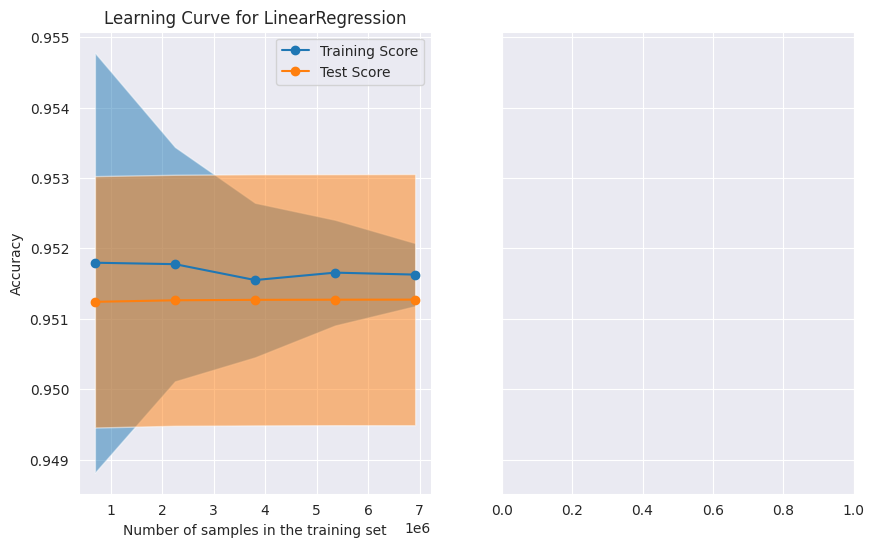

In [133]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": x_scaled,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([lr, xgbr]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")